In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
plt.style.use("seaborn")

In [0]:
np.random.seed(0)

In [0]:
def euclidean_distance(x1,x2):
  return np.sqrt(np.sum(x1-x2)**2)

In [0]:
wcss=[]
class kmeans:
  
  def __init__(self,k,max_iters=100,plot_steps=False):
    self.k=k
    self.max_iters=max_iters
    self.plot_steps=plot_steps

    self.clusters=[[] for _ in range(self.k)]

    self.centroids=[]

  def predict(self,X):
    self.X=X
    self.n_samples,self.n_features=X.shape

    random_sample_indices=np.random.choice(self.n_samples,self.k,replace=False)

    self.centroids=[self.X[idx] for idx in random_sample_indices]
    
    for _ in range(self.max_iters):
      self.clusters=self.create_clusters(self.centroids)
      if self.plot_steps:
        self.plot()
      centroids_old=self.centroids
      self.centroids=self.get_centroids(self.clusters)
      o=self.wcss(self.clusters,self.centroids)
      

      if self.is_converged(centroids_old,self.centroids):
        break
    return self.get_cluster_labels(self.clusters)

  def wcss(self,clusters,centroids):
    q=0
    for cluster_idx,cluster in enumerate(clusters):
      for i in cluster:
        q+=euclidean_distance(self.X[i],centroids[cluster_idx])
    wcss.append(q)



  def get_cluster_labels(self,clusters):
    labels=np.empty(self.n_samples)

    for cluster_idx,cluster in enumerate(clusters):
      for sample_idx in cluster:
        labels[sample_idx]=cluster_idx
    return labels





  def create_clusters(self,centroids):
    self.clusters=[[] for _ in range(self.k)]
    for idx,sample in enumerate(self.X):
      centroid_idx=self.centroid(sample,self.centroids)
      self.clusters[centroid_idx].append(idx)
    return self.clusters

  def get_centroids(self,clusters):
    centroids=np.zeros((self.k,self.n_features))
    for clust_idx,cluster in enumerate(clusters):
      cluster_mean=np.mean(self.X[cluster],axis=0)
      centroids[clust_idx]=cluster_mean
    return centroids




  def centroid(self,sample,centroids):
    distances=[euclidean_distance(sample,point) for point in centroids]
    closest_idx=np.argmin(distances)
    return closest_idx

  def is_converged(self,centroids_old,centroids):
    distances=[euclidean_distance(centroids_old[i],centroids[i]) for i in range(self.k)]
    return sum(distances)==0

  def plot(self):
    fig,ax=plt.subplots(figsize=(6,3))
    for i,index in enumerate(self.clusters):
      point=self.X[index].T
      ax.scatter(*point)

    for point in self.centroids:
      ax.scatter(*point,marker="x",color="black",linewidth=2)

    plt.show()












In [0]:
import pandas as pd

In [0]:
X=pd.read_csv('Kmeans_data.csv')

In [0]:
X=X.to_numpy()

In [0]:
scaler = StandardScaler()

In [0]:
X=scaler.fit_transform(X)

In [0]:
k=kmeans(2,100,True)

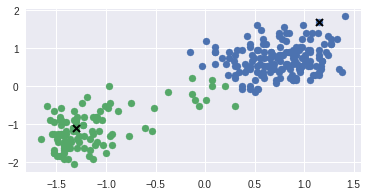

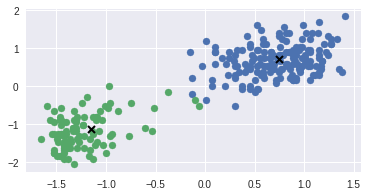

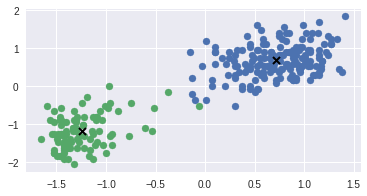

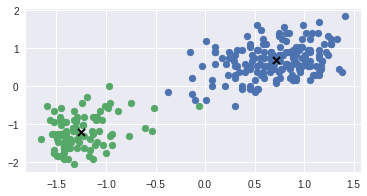

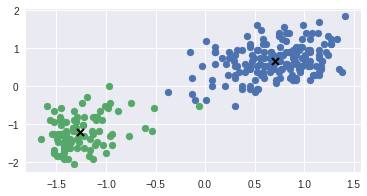

In [52]:
y_pred=k.predict(X)

In [53]:
y_pred

array([0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 0.

In [54]:
wcss

[140.3802287439215,
 131.8532691944227,
 131.61633289098836,
 131.55526573115196,
 131.55526573115196]

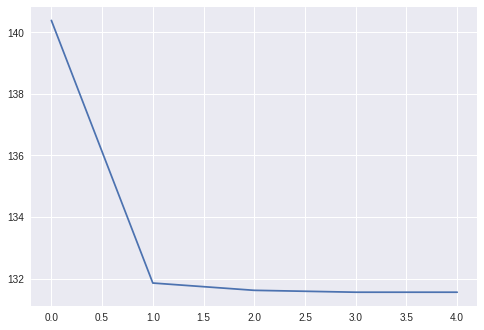

In [55]:
p=plt.plot(wcss)